In [1]:
#Use the breast cancer dataset available in the sklearn library.
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
#loading dataset
data=load_breast_cancer()
#create a dataframe
df =pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
#store feature in x and target in y
x=df.drop('target',axis=1)
y=df['target']
y


,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


1)**Preprocessing**

a)Checking null values


In [2]:
#Handling missing values
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


**No Missing values**

B)Scaling


In [3]:
#feature scaling
from sklearn.preprocessing import StandardScaler
#create scalar object
scaler=StandardScaler()
#fit and transform features(x)
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

c)Outlier Detection


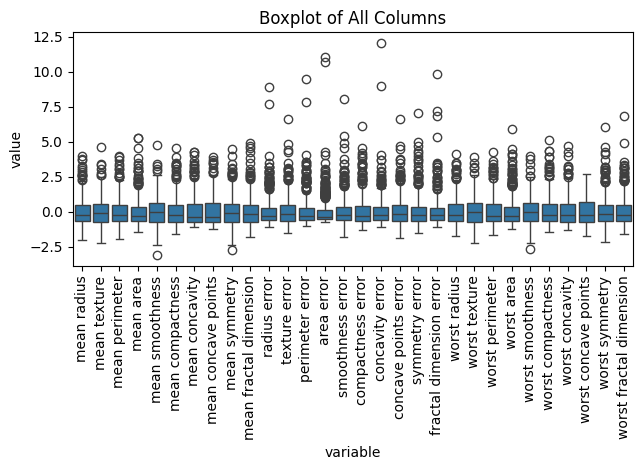

In [4]:
# Create the boxplot to detect presence of outlier
import seaborn as  sns
import matplotlib.pyplot as plt
x_scaled_df = pd.DataFrame(x_scaled, columns=data.feature_names)
df_melted = pd.melt(x_scaled_df)  #melt dataframe for plotting
#create the boxplot
sns.boxplot(x="variable",y="value",data=df_melted)
plt.xticks(rotation=90)
plt.title("Boxplot of All Columns")
plt.tight_layout()
plt.show()

**Presence of Outliers**: The presence of points plotted beyond the whiskers indicates the existence of outliers in the dataset.

**Varying Outlier Frequency**: Some features have more outliers than others, suggesting that certain variables are more prone to extreme values.

So,We can cap outlier using IQR Method.


D)Outlier Caping Using IQR


In [5]:
#creating a function for capping outlier
def cap_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_capped = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    return df_capped

#calling function
x_capped = cap_outliers_iqr(x_scaled_df)

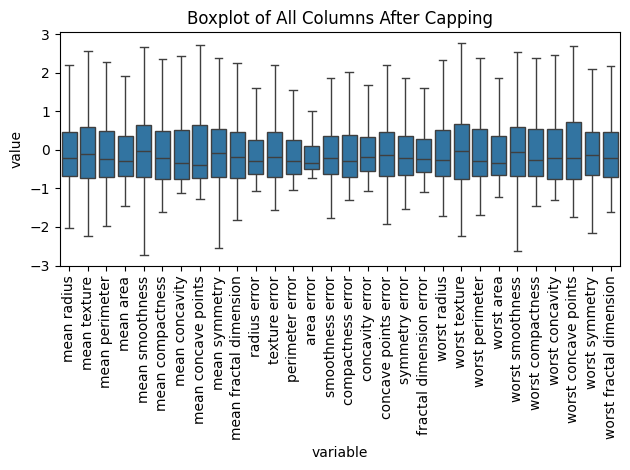

In [6]:
X=pd.melt(x_capped) #melting dataframe for plotting
#creating boxplot after capping outlier
sns.boxplot(x="variable",y="value",data=X)
plt.xticks(rotation=90)
plt.title("Boxplot of All Columns After Capping")
plt.tight_layout()
plt.show()

**PREPROCESSING STEPS DONE:**

**Data cleaning:** Checking for and handling missing values (if any).

**Feature scaling**: Transforming features to a common scale using StandardScaler.

**Outlier handling:** Identifying and capping outliers using the IQR method.

**Visualization:** Using box plots to visualize the data distribution before and after outlier handling.

These steps are crucial for preparing  data for machine learning tasks, as they can improve the performance and stability of models. By addressing missing values, scaling features, and handling outliers,  ensured that your data is in a suitable format for analysis and model training.



2. **Classification Algorithm Implementation**

In [7]:
# Split the dataset into training and testing sets
#import necessary module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_capped, y)


A)Logistic Regression


In [8]:
#import module
from sklearn.linear_model import LogisticRegression
# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Make predictions
logreg_pred = logreg.predict(X_test)
logreg_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

Logistic regression is a statistical method used for binary classification, where the goal is to predict the probability of an instance belonging to one of two classes (e.g., malignant or benign). It works by fitting a logistic function (also called a sigmoid function) to the data, which outputs a probability value between 0 and 1.

Logistic regression is a suitable algorithm for the breast cancer dataset due to its binary classification nature, interpretability, efficiency, and ability to model linear relationships between features and the target. However, consider potential limitations if your data has complex non-linear relationships or feature interactions.

B) Decision Tree Classifier


In [9]:
#import module
from sklearn.tree import DecisionTreeClassifier
#initialize and train the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
dt_pred = dt.predict(X_test)
dt_pred


array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

A Decision Tree Classifier is a supervised machine learning algorithm that builds a tree-like structure to make predictions. It works by recursively partitioning the data based on feature values, creating a set of rules that lead to a classification decision.

The Decision Tree Classifier is suitable for the breast cancer dataset due to its interpretability, ability to handle non-linearity and feature importance, and flexibility with different data types.

C) Random Forest Classifier


In [10]:
#Import the module
from sklearn.ensemble import RandomForestClassifier
#initialize and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
rf_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

How it works:

1)**Bootstrap Aggregating (Bagging)**: The algorithm creates multiple subsets of the data by randomly sampling with replacement (bootstrapping).

2)**Decision Tree Construction:** A decision tree is trained on each subset of the data.

3)**Feature Randomness**: At each node of the decision tree, a random subset of features is considered for splitting, further increasing diversity among the trees.

4)**Ensemble Prediction**: For classification, the predictions from all individual trees are aggregated, and the class with the most votes becomes the final prediction.

The Random Forest Classifier is suitable for the breast cancer dataset because it tends to provide high accuracy, is robust to outliers and noise, offers feature importance insights, handles non-linearity, and reduces overfitting. It is a powerful and versatile algorithm that often performs well on a variety of datasets, including medical datasets like the breast cancer dataset.

D) Support Vector Machine (SVM)


In [11]:
#import the module
from sklearn.svm import SVC
# intialize and Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions
svm_pred = svm_classifier.predict(X_test)
svm_pred

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

SVC uses a set of labeled training examples to find a decision boundary that separates the data points into different classes. The decision boundary is represented as a linear function, and the goal is to find the boundary that maximizes the separation between the classes.

SVM is suitable for the breast cancer dataset due to its effectiveness in high-dimensional spaces, ability to handle non-linearity, regularization, and good generalization capabilities

E) k-Nearest Neighbors (k-NN)


In [12]:
#Import module
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initilize and train the model
knn.fit(X_train, y_train)
#Make predictions
knn_pred=knn.predict(X_test)
knn_pred


array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

**How it works:**

**Storing Data:** k-NN stores all the training data points.

**Calculating Distances**: When a new data point needs to be classified, it calculates the distance between the new point and all the stored data points.


**Finding Nearest Neighbors**: It identifies the k nearest data points (neighbors) based on the calculated distances.

**Majority Voting (Classification)**: For classification, the algorithm assigns the new data point to the class that is most frequent among its k nearest neighbors.

k-NN can be a suitable algorithm for the breast cancer dataset due to its simplicity, ability to handle non-linear relationships, and no separate training phase.



**3) MODEL COMPARISON**

In [13]:
#Import necessary modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

predictions = {
    "Logistic Regression": logreg_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    " Support Vector Machine": svm_pred,
    "k-Nearest Neighbors": knn_pred,
}

# Initialize a dictionary to store metrics
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

#  compute metrics for each model
for model_name, y_pred in predictions.items():
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='macro'))
    results["Recall"].append(recall_score(y_test, y_pred, average='macro'))
    results["F1-Score"].append(f1_score(y_test, y_pred, average='macro'))

results

{'Model': ['Logistic Regression',
  'Decision Tree',
  'Random Forest',
  ' Support Vector Machine',
  'k-Nearest Neighbors'],
 'Accuracy': [0.986013986013986,
  0.916083916083916,
  0.958041958041958,
  0.993006993006993,
  0.9790209790209791],
 'Precision': [0.989247311827957,
  0.9047667342799188,
  0.9517270079067832,
  0.9945652173913043,
  0.9793265132139812],
 'Recall': [0.9807692307692308,
  0.9217032967032968,
  0.9587912087912088,
  0.9903846153846154,
  0.9752747252747254],
 'F1-Score': [0.9847612958226768,
  0.9113636363636364,
  0.9550314465408805,
  0.9924133906308027,
  0.9772401718924081]}

In [14]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results)


# Display the results
print(results_df)


                     Model  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression  0.986014   0.989247  0.980769  0.984761
1            Decision Tree  0.916084   0.904767  0.921703  0.911364
2            Random Forest  0.958042   0.951727  0.958791  0.955031
3   Support Vector Machine  0.993007   0.994565  0.990385  0.992413
4      k-Nearest Neighbors  0.979021   0.979327  0.975275  0.977240


In [15]:
# Sort by F1-Score
results_df = results_df.sort_values(by="F1-Score",ascending=False)
print(results_df)

                     Model  Accuracy  Precision    Recall  F1-Score
3   Support Vector Machine  0.993007   0.994565  0.990385  0.992413
0      Logistic Regression  0.986014   0.989247  0.980769  0.984761
4      k-Nearest Neighbors  0.979021   0.979327  0.975275  0.977240
2            Random Forest  0.958042   0.951727  0.958791  0.955031
1            Decision Tree  0.916084   0.904767  0.921703  0.911364


From evaluation Metric,**Suppot Vector Machine** has **high F1-score**. So, Support Vector machine is best.At the same time,**Decision Tree has low F1-Score**.So,it is the **worst model** here.